<a href="https://colab.research.google.com/github/Noob919/ResearchProject/blob/main/Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dask
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import dask.dataframe as dd

In [ ]:
cols_to_read = ['Bwd.Packet.Length.Max', 'Max.Packet.Length', 'Bwd.Packet.Length.Std', 'Packet.Length.Variance', 'Packet.Length.Std', 'Average.Packet.Size', 'PSH.Flag.Count', 'Down.Up.Ratio', 'Init_Win_bytes_forward', 'Total.Length.of.Bwd.Packets', 'Subflow.Fwd.Packets', 'FIN.Flag.Count', 'Fwd.Packet.Length.Max', 'act_data_pkt_fwd', 'Min.Packet.Length', 'URG.Flag.Count', 'Fwd.IAT.Min', 'Fwd.Packet.Length.Mean', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Bwd.IAT.Total', 'Idle.Min', 'Fwd.IAT.Mean', 'SYN.Flag.Count', 'Fwd.IAT.Std', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Bwd.Packet.Length.Min', 'L7Protocol','ProtocolName']
data  = pd.read_csv("/content/drive/MyDrive/DataResearch/Dataset-Unicauca-Version2-87Atts.csv", usecols=cols_to_read)
data.head()

In [17]:
cols_to_read = ['Bwd.Packet.Length.Max', 'Max.Packet.Length', 'Bwd.Packet.Length.Std', 'Packet.Length.Variance', 'Packet.Length.Std', 'Average.Packet.Size', 'PSH.Flag.Count', 'Down.Up.Ratio', 'Init_Win_bytes_forward', 'Total.Length.of.Bwd.Packets', 'Subflow.Fwd.Packets', 'FIN.Flag.Count', 'Fwd.Packet.Length.Max', 'act_data_pkt_fwd', 'Min.Packet.Length', 'URG.Flag.Count', 'Fwd.IAT.Min', 'Fwd.Packet.Length.Mean', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Bwd.IAT.Total', 'Idle.Min', 'Fwd.IAT.Mean', 'SYN.Flag.Count', 'Fwd.IAT.Std', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Bwd.Packet.Length.Min', 'L7Protocol','ProtocolName']
training_dataframes = dd.read_csv("/content/drive/MyDrive/DataResearch/Dataset-Unicauca-Version2-87Atts.csv", usecols= cols_to_read,assume_missing=True)

In [ ]:
training_dataframes.columns

In [19]:
training_dataframes.head()

,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Mean,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Std,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Min,Fwd.IAT.Total,...,PSH.Flag.Count,URG.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Subflow.Fwd.Packets,Init_Win_bytes_forward,act_data_pkt_fwd,Idle.Min,L7Protocol,ProtocolName
0,110414.0,6.0,6.000000,4380.0,1187.0,768.481689,598.986842,816.061346,1.0,45523.0,...,0.0,0.0,2.0,1435.74026,22.0,256.0,21.0,0.0,131.0,HTTP_PROXY
1,0.0,6.0,6.000000,0.0,0.0,0.000000,1.000000,0.000000,1.0,1.0,...,0.0,1.0,0.0,9.00000,2.0,490.0,1.0,0.0,131.0,HTTP_PROXY
2,0.0,337.0,224.666667,0.0,0.0,0.000000,0.500000,0.707107,0.0,1.0,...,0.0,0.0,0.0,337.00000,3.0,888.0,1.0,0.0,7.0,HTTP
3,0.0,0.0,0.000000,0.0,0.0,0.000000,72.333333,62.660461,0.0,0.0,...,0.0,1.0,3.0,0.00000,1.0,888.0,0.0,0.0,7.0,HTTP
4,0.0,529.0,215.200000,0.0,0.0,0.000000,19517.000000,25758.502350,0.0,78068.0,...,0.0,0.0,0.0,321.00000,5.0,253.0,4.0,0.0,131.0,HTTP_PROXY


In [42]:
list_of_protocols = ["HTTP", "HTTP_PROXY", "HTTP_CONNECT", "SSL", "GOOGLE", "YOUTUBE", "FACEBOOK", "CONTENT_FLASH"]

filtered_dataframe = training_dataframes[training_dataframes['ProtocolName'].isin(list_of_protocols)].compute()

In [43]:
filtered_dataframe['ProtocolName'].value_counts()

GOOGLE           959110
HTTP             683734
HTTP_PROXY       623210
SSL              404883
HTTP_CONNECT     317526
YOUTUBE          170781
FACEBOOK          29033
CONTENT_FLASH      8589
Name: ProtocolName, dtype: int64

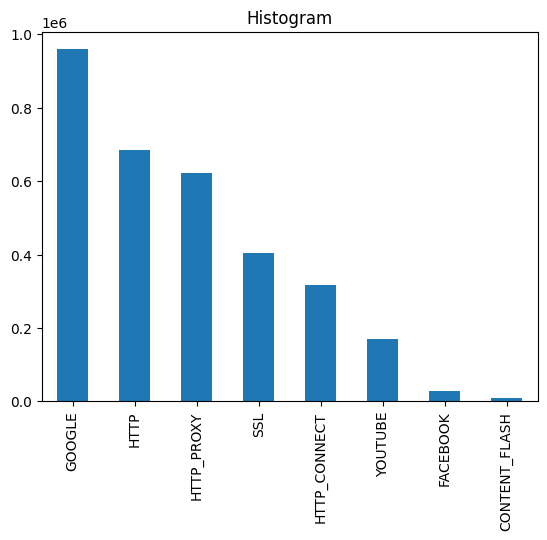

In [38]:
# Compute the histogram using Dask and convert it to Pandas for plotting
histogram = filtered_dataframe['ProtocolName'].value_counts()

# Create a bar plot (histogram)
histogram.plot(kind='bar', title='Histogram')
plt.show()

In [44]:
# Group the DataFrame by 'ProtocolName' and select the top 200 rows for each group
result_dataframe = (
    filtered_dataframe.groupby('ProtocolName')
    .head(200)
)

# If you want to reset the index
result_dataframe = result_dataframe.reset_index(drop=True)

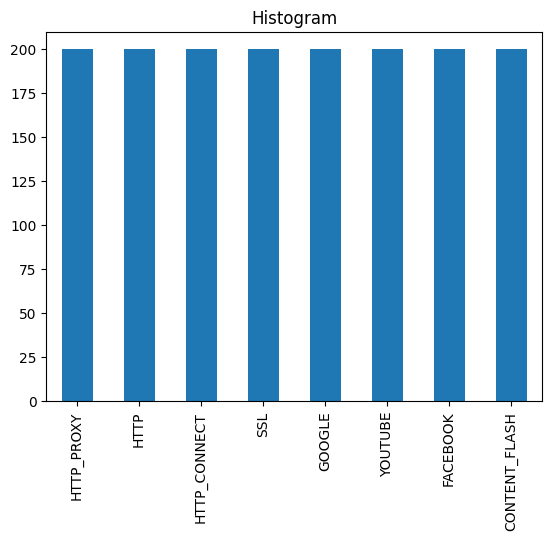

In [46]:
# Compute the histogram using Dask and convert it to Pandas for plotting
histogram = result_dataframe['ProtocolName'].value_counts()

# Create a bar plot (histogram)
histogram.plot(kind='bar', title='Histogram')
plt.show()

In [ ]:
iot1_column =["HTTP", "HTTP_PROXY", "HTTP_CONNECT", "SSL"]
iot1_dataframe = result_dataframe[result_dataframe['ProtocolName'].isin(iot1_column)]
iot1_dataframe.head(10)

In [ ]:
# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'ProtocolName' column
iot1_dataframe['ProtocolName_encoded'] = label_encoder.fit_transform(iot1_dataframe['ProtocolName'])


In [57]:
iot1_dataframe

,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Mean,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Std,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Min,Fwd.IAT.Total,...,URG.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Subflow.Fwd.Packets,Init_Win_bytes_forward,act_data_pkt_fwd,Idle.Min,L7Protocol,ProtocolName,ProtocolName_encoded
0,110414.0,6.0,6.000000,4380.0,1187.0,768.481689,598.986842,816.061346,1.0,45523.0,...,0.0,2.0,1435.740260,22.0,256.0,21.0,0.0,131.0,HTTP_PROXY,2
1,0.0,6.0,6.000000,0.0,0.0,0.000000,1.000000,0.000000,1.0,1.0,...,1.0,0.0,9.000000,2.0,490.0,1.0,0.0,131.0,HTTP_PROXY,2
2,0.0,337.0,224.666667,0.0,0.0,0.000000,0.500000,0.707107,0.0,1.0,...,0.0,0.0,337.000000,3.0,888.0,1.0,0.0,7.0,HTTP,0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,72.333333,62.660461,0.0,0.0,...,1.0,3.0,0.000000,1.0,888.0,0.0,0.0,7.0,HTTP,0
4,0.0,529.0,215.200000,0.0,0.0,0.000000,19517.000000,25758.502350,0.0,78068.0,...,0.0,0.0,321.000000,5.0,253.0,4.0,0.0,131.0,HTTP_PROXY,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,833.0,552.0,114.000000,803.0,0.0,241.227731,67076.333333,186376.297605,0.0,1006145.0,...,0.0,2.0,87.687500,5.0,8192.0,4.0,0.0,131.0,HTTP_PROXY,2
1067,901417.0,327.0,5.857143,7300.0,0.0,969.946572,1670.057283,10466.996591,0.0,1020405.0,...,0.0,3.0,1474.310458,147.0,8192.0,90.0,0.0,131.0,HTTP_PROXY,2
1068,194735.0,327.0,10.255814,7300.0,0.0,1061.315596,1123.119497,6657.157532,0.0,178576.0,...,0.0,2.0,1219.850000,43.0,8192.0,20.0,0.0,131.0,HTTP_PROXY,2
1070,248307.0,1004.0,49.130435,4096.0,0.0,1219.177012,5069.529070,32170.186464,0.0,871547.0,...,0.0,6.0,1441.832370,23.0,8192.0,22.0,0.0,131.0,HTTP_PROXY,2


In [ ]:
iot2_column =["GOOGLE", "YOUTUBE", "FACEBOOK", "CONTENT_FLASH"]
iot2_dataframe = result_dataframe[result_dataframe['ProtocolName'].isin(iot2_column)]
# Fit and transform the 'ProtocolName' column
iot2_dataframe['ProtocolName_encoded'] = label_encoder.fit_transform(iot2_dataframe['ProtocolName'])
iot2_dataframe

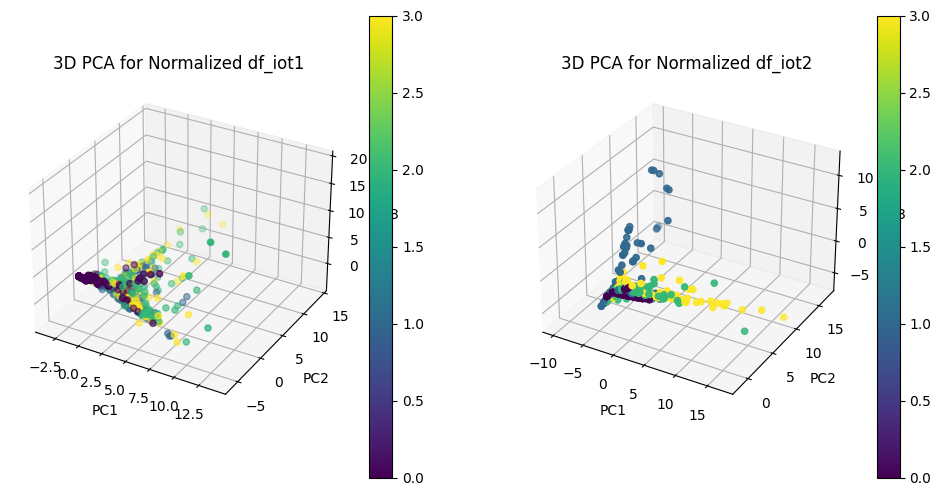

In [63]:
# Normalizing the datasets (excluding ProtocolName for PCA)
features_iot1 = iot1_dataframe.drop(columns=['ProtocolName'])
features_iot2 = iot2_dataframe.drop(columns=['ProtocolName'])

scaler = StandardScaler()
normalized_iot1 = scaler.fit_transform(features_iot1)
normalized_iot2 = scaler.fit_transform(features_iot2)

# Performing PCA for normalized datasets
pca1 = PCA(n_components=3)
principalComponents1 = pca1.fit_transform(normalized_iot1)

pca2 = PCA(n_components=3)
principalComponents2 = pca2.fit_transform(normalized_iot2)

# Plotting the 3D scatter plots for normalized datasets with color according to ProtocolName
fig = plt.figure(figsize=(12, 6))

# Plot for df_iot1
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('3D PCA for Normalized df_iot1')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
scatter1 = ax1.scatter(principalComponents1[:, 0], principalComponents1[:, 1], principalComponents1[:, 2],
                       c=iot1_dataframe['ProtocolName_encoded'].values, cmap='viridis', marker='o')
plt.colorbar(scatter1, ax=ax1)

# Plot for df_iot2
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('3D PCA for Normalized df_iot2')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
scatter2 = ax2.scatter(principalComponents2[:, 0], principalComponents2[:, 1], principalComponents2[:, 2],
                       c=iot2_dataframe['ProtocolName_encoded'].values, cmap='viridis', marker='o')
plt.colorbar(scatter2, ax=ax2)

plt.show()

In [ ]:
!pip install fitter

In [66]:
from fitter import Fitter, get_common_distributions, get_distributions

In [69]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,0.0040071365927778,10137.3714153486398573,10146.7406388039762533,inf,0.4753524601476264,0.0000000000000000
norm,0.0042359768098943,10094.6441894910039991,10104.0134129463403951,inf,0.4138237034887426,0.0000000000000000
powerlaw,0.0046460509468346,2137.0146026882966908,2151.0684378713003753,inf,0.8041010566372442,0.0000000000000000
uniform,0.0048162888772605,1428.2504906489082259,1437.6197141042441672,inf,0.9108441033925687,0.0000000000000000
lognorm,0.0048461203974561,2528.9988943175058012,2543.0527295005094857,inf,0.5214661402570459,0.0000000000000000


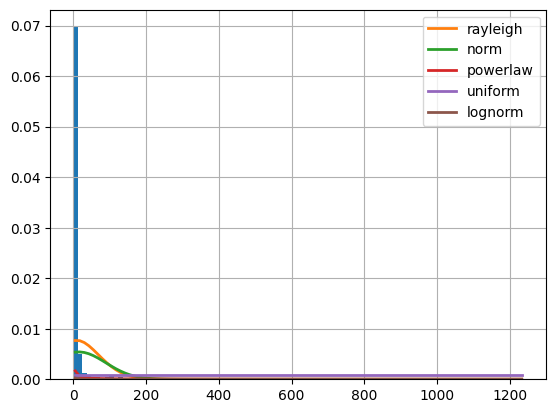

In [78]:
f = Fitter(iot1_dataframe['act_data_pkt_fwd'],
           distributions= ['gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()